In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import seaborn as sb

In [2]:
df = pd.read_csv('uci-electricity-usage/uci-electricity-usage.csv')
df.head(3)

,date,target_appliances,target_lights,target_total,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/1/16 17:00,60,30,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/1/16 17:10,60,30,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/1/16 17:20,50,30,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [3]:
df.tail(3)

,date,target_appliances,target_lights,target_total,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19732,27/5/16 17:40,270,10,280,25.5,46.596667,25.628571,42.768571,27.050000,41.690000,...,23.2,46.7900,22.5,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27/5/16 17:50,420,10,430,25.5,46.990000,25.414000,43.036000,26.890000,41.290000,...,23.2,46.8175,22.3,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784
19734,27/5/16 18:00,430,10,440,25.5,46.600000,25.264286,42.971429,26.823333,41.156667,...,23.2,46.8450,22.2,755.2,57.000000,4.000000,27.000000,13.2,34.118851,34.118851


In [4]:
df.shape

(19735, 30)

In [5]:
# There's no missing value
df.isna().sum()

date                 0
target_appliances    0
target_lights        0
target_total         0
T1                   0
RH_1                 0
T2                   0
RH_2                 0
T3                   0
RH_3                 0
T4                   0
RH_4                 0
T5                   0
RH_5                 0
T6                   0
RH_6                 0
T7                   0
RH_7                 0
T8                   0
RH_8                 0
T9                   0
RH_9                 0
T_out                0
Press_mm_hg          0
RH_out               0
Windspeed            0
Visibility           0
Tdewpoint            0
rv1                  0
rv2                  0
dtype: int64

In [6]:
#Except Date column, the rest of the data are all numerical values
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
date                 19735 non-null object
target_appliances    19735 non-null int64
target_lights        19735 non-null int64
target_total         19735 non-null int64
T1                   19735 non-null float64
RH_1                 19735 non-null float64
T2                   19735 non-null float64
RH_2                 19735 non-null float64
T3                   19735 non-null float64
RH_3                 19735 non-null float64
T4                   19735 non-null float64
RH_4                 19735 non-null float64
T5                   19735 non-null float64
RH_5                 19735 non-null float64
T6                   19735 non-null float64
RH_6                 19735 non-null float64
T7                   19735 non-null float64
RH_7                 19735 non-null float64
T8                   19735 non-null float64
RH_8                 19735 non-null float64
T9                

,target_appliances,target_lights,target_total,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,101.496833,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,104.380829,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,1110.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


The data was collected in 10 min interval from Jan to May.

From above analysis, the target_appliances has maximum of 1080. Which is way above the normal range.
Also most of the data are 0 for target_lights.
In order to visisualize outliers, draw boxplots. 

From the boxplot, there were many outliers. It can possibly becuase the data is collected every 10 minutes including when residents are away or sleeping. Hence most of the collected points are low comparing to few heavy usages when residents are at home and using appliances and lights

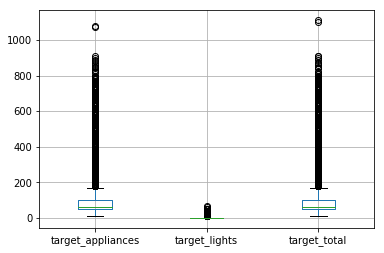

In [7]:
df.boxplot(['target_appliances', 'target_lights','target_total'])

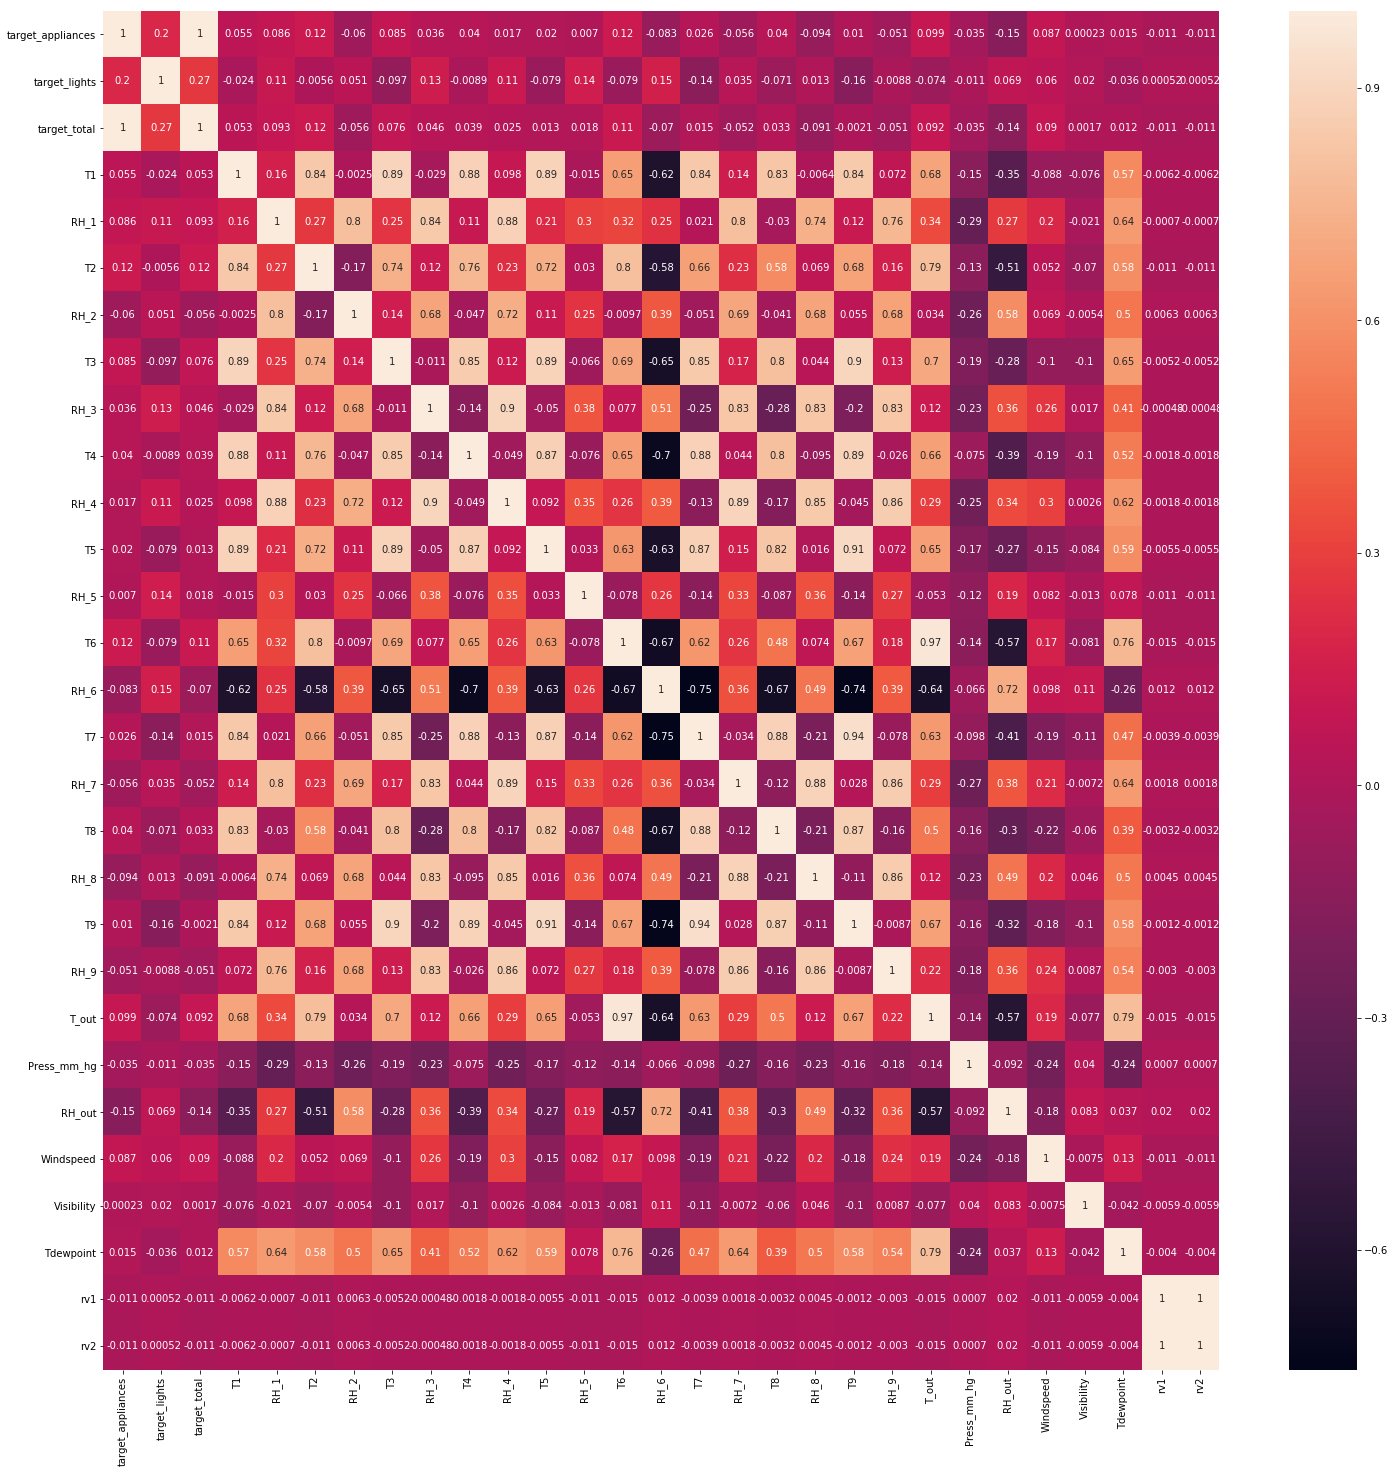

In [8]:
# To find out how each features correlate to each other
pp.figure(figsize=[25,25])
corr = df.corr()
sb.heatmap(corr, annot=True);

The temperature is negatively correlated with humidity. 
The increase in outside humidity causes the room temperature to drop. 
Outside temperature has positive correlationship with room temperature which is expected. 
The target total also has correlationship with outside humidity.

rv1 and rv2 seems irrelvant since they don't seem to have strong relation with any feature. We'll perform feature ranking later to see which features are most important.

<h1>Data Preprocessing</h1>

In [9]:
# First of all, convert Date column into datetime64 object
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y %H:%M')
df.dtypes

date                 datetime64[ns]
target_appliances             int64
target_lights                 int64
target_total                  int64
T1                          float64
RH_1                        float64
T2                          float64
RH_2                        float64
T3                          float64
RH_3                        float64
T4                          float64
RH_4                        float64
T5                          float64
RH_5                        float64
T6                          float64
RH_6                        float64
T7                          float64
RH_7                        float64
T8                          float64
RH_8                        float64
T9                          float64
RH_9                        float64
T_out                       float64
Press_mm_hg                 float64
RH_out                      float64
Windspeed                   float64
Visibility                  float64
Tdewpoint                   

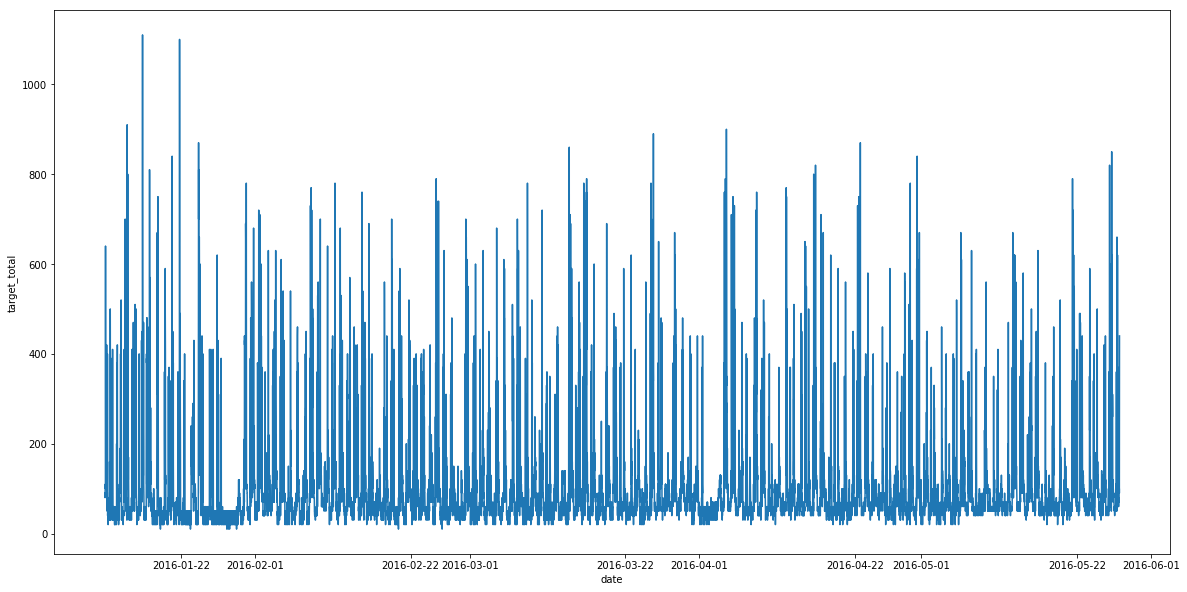

In [10]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# The trend for date against the target_total is plotted.
pp.rcParams['figure.figsize'] = [20, 10]
pp.figure()
pp.plot(df['date'], df['target_total'])
pp.xlabel("date")
pp.ylabel("target_total")
pp.show()

The target_total is flatuating along the time line instead of having a stable line. 
It may be because of time in a day or day of the week.

In [11]:
datatime_df = df[["date","target_appliances", "target_lights", "target_total"]]
datatime_df = datatime_df.set_index('date')
datatime_df.head(2)

,target_appliances,target_lights,target_total
date,,,
2016-01-11 17:00:00,60,30,90
2016-01-11 17:10:00,60,30,90


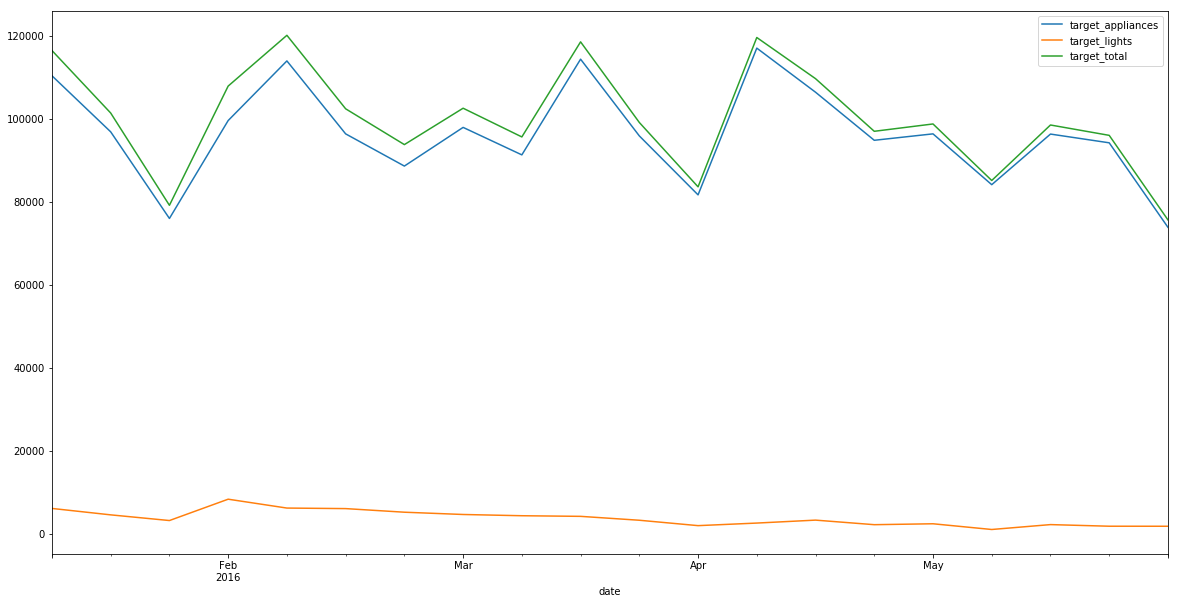

In [12]:
weekly = datatime_df.resample('W').sum()
weekly.plot();

It can be seen that the trend for target_light is stable across the months. 
The target total is contributed mainly from appliances. <br>
To get the better idea, pull out the trend in week.

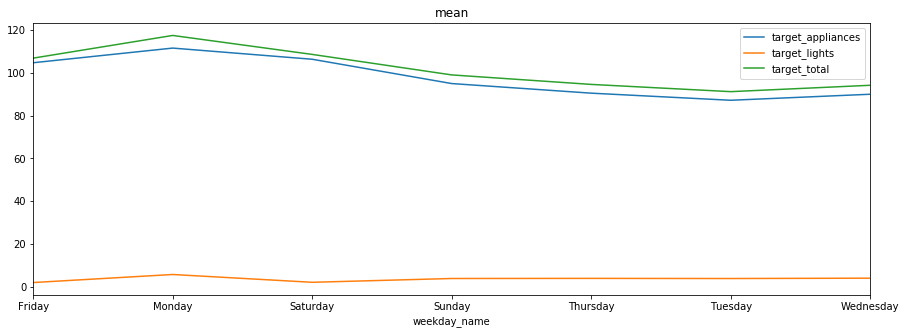

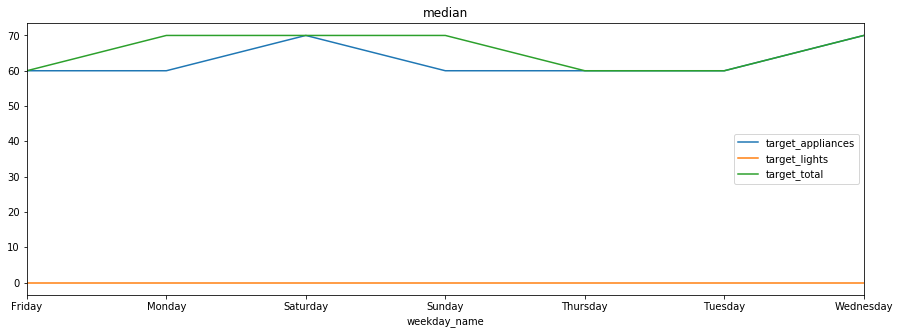

In [13]:
week_day = datatime_df.copy()
week_day ['weekday_name'] = week_day.index.weekday_name

week_day_mean = week_day.groupby(['weekday_name']).mean()
week_day_mean.plot(title='mean', figsize=[15,5]);

week_day_median = week_day.groupby(['weekday_name']).median()
week_day_median.plot(title='median', figsize=[15,5]);

From above graphs, the appliances usage is normally higher on Saturday and Wednesdy. <br>
The average is slightly higher on Mondays, which means more usage spikes on Mondays. The electricity usage is still stable.<br>
However, there's no clear trend
We pull out the trend for each hour to see hourly usuage.

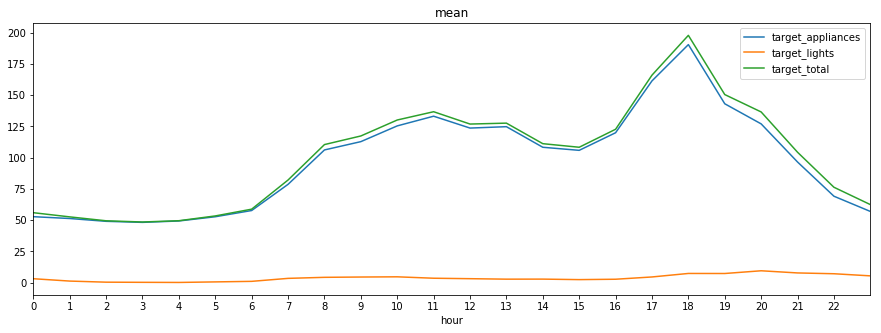

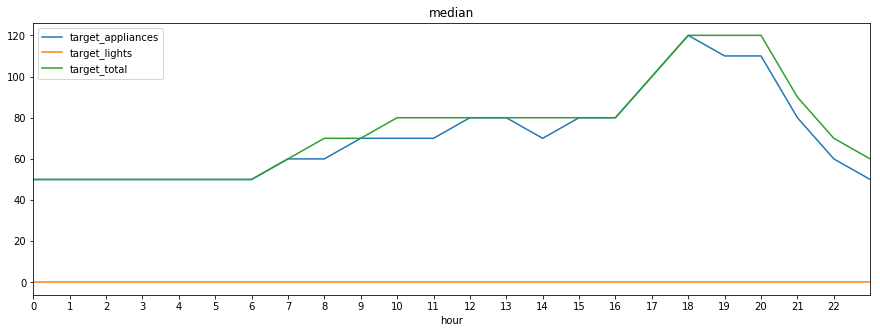

In [14]:
hour = datatime_df.copy()
hour['hour'] = week_day.index.hour

hour_mean = hour.groupby(['hour']).mean()
hour_mean.plot(title='mean', figsize=[15,5], xticks=np.arange(0,23));

hour_median = hour.groupby(['hour']).median()
hour_median.plot(title='median', figsize=[15,5], xticks=np.arange(0,23));

The usuage is stable at night, but spikes up in the evening ard 6pm.

In [15]:
# reference: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
# reference: https://medium.com/@swethalakshmanan14/simple-ways-to-extract-features-from-date-variable-using-python-60c33e3b0501

# Replace date column with columns of individual date componenets
df['day'] = datatime_df.index.day
df['month'] = datatime_df.index.month
df['year'] = datatime_df.index.year
df['hour'] = datatime_df.index.hour
df['min'] = datatime_df.index.minute
df.drop('date', axis=1, inplace=True)

Now all the columns are transformed into numerical values. There's no categorical values that needs encoding/ transforming.

<h3>Feature Scaling</h3>

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(['target_appliances', 'target_lights', 'target_total'], axis=1)
Y = df[['target_appliances', 'target_lights', 'target_total']]
y_total = Y[['target_total']]

In [42]:
# Normalization

from sklearn import preprocessing

X_normalized = pd.DataFrame(preprocessing.normalize(X), columns=X.columns)
X_normalized.head(3)

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,day,month,year,hour,min
0,0.009231,0.022089,0.00891,0.020786,0.009184,0.020759,0.008818,0.021147,0.007967,0.025617,...,0.003249,0.029237,0.002460,0.006161,0.006161,0.005105,0.000464,0.935596,0.007889,0.000000
1,0.009231,0.021670,0.00891,0.020755,0.009184,0.020786,0.008818,0.021344,0.007967,0.025617,...,0.003094,0.027458,0.002413,0.008635,0.008635,0.005105,0.000464,0.935593,0.007889,0.004641
2,0.009230,0.021485,0.00891,0.020709,0.009184,0.020851,0.008783,0.021295,0.007966,0.025564,...,0.002939,0.025677,0.002367,0.013292,0.013292,0.005105,0.000464,0.935522,0.007889,0.009281


<h3>Training Model (with features selected)</h3>

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [137]:
# Reference:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
# https://machinelearningmastery.com/feature-selection-machine-learning-python/
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

model = LogisticRegression()
rfe = RFE(model, 15)
rfe = rfe.fit(X_normalized, y_total.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

[False False False  True False False False False False  True  True  True
 False  True  True  True False  True  True  True  True False False  True
 False False  True False  True  True False]
[10  8  5  1  6 11  3 14  7  1  1  1  2  1  1  1  4  1  1  1  1 12 13  1
 16 17  1 15  1  1  9]


In [126]:
selected_columns = rfe.support_
X_columns = X.columns

#after feature selection
X_feature_selected = X.copy()

for index in range(selected_columns.size):
    if (selected_columns[index]==False):
        X_feature_selected.drop(X_columns[index], axis=1, inplace=True)

In [133]:
selected_columns = rfe.support_
X_columns = X.columns

#after feature selection
X_feature_selected = X.copy()

for index in range(selected_columns.size):
    if (selected_columns[index]==True):
        print(X_columns[index])

T2
RH_2
T3
T4
RH_5
T6
RH_6
T7
RH_7
T8
RH_8
T9
RH_9
T_out
Press_mm_hg
RH_out
Tdewpoint
day
year
hour


In [127]:
X_train, X_test, y_train_tot, y_test_tot = train_test_split(X_feature_selected, y_total, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train_tot.shape)
print(y_test_tot.shape)

(13814, 20)
(5921, 20)
(13814, 1)
(5921, 1)


<h3>Training Model</h3>

In [128]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train_tot)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [138]:
predictions = lg.predict(X_train)

In [141]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train_tot, predictions) 

0.23903286520920805